# Online Retail II - Quantity Regresyon Analizi

Bu notebook, e-ticaret işlem kayıtlarından satış miktarını (Quantity) tahmin etmek için kapsamlı bir makine öğrenmesi analizi içermektedir.

## 📊 Giriş ve Çıktı Sütunları

### Giriş Sütunları (Input Features / Bağımsız Değişkenler)

Modelin tahmin yapmak için kullandığı özellikler:

| Sütun Adı | Veri Tipi | Açıklama | Ön İşleme |
|-----------|-----------|----------|-----------|
| **Price** | Float | Ürün birim fiyatı (Sterlin) | StandardScaler ile normalize edilir |
| **Country** | String | Müşterinin bulunduğu ülke | OneHotEncoder ile kodlanır |
| **invoice_year** | Integer | Faturanın yılı (2009, 2010, 2011) | StandardScaler ile normalize edilir |
| **invoice_month** | Integer | Faturanın ayı (1-12) | StandardScaler ile normalize edilir |
| **invoice_dow** | Integer | Haftanın günü (0=Pazartesi, 6=Pazar) | StandardScaler ile normalize edilir |
| **invoice_hour** | Integer | Faturanın saati (0-23) | StandardScaler ile normalize edilir |
| **is_weekend** | Boolean | Hafta sonu kontrolü (True/False) | StandardScaler ile normalize edilir |

**Toplam Giriş Özellik Sayısı**: 7 özellik (Country OneHotEncoder sonrası ~40+ sütuna dönüşür)

### Çıktı Sütunu (Output / Target / Bağımlı Değişken)

Modelin tahmin etmeye çalıştığı değer:

| Sütun Adı | Veri Tipi | Açıklama | Değer Aralığı |
|-----------|-----------|----------|--------------|
| **Quantity** | Integer | Satılan ürün miktarı | Pozitif tam sayılar (1, 2, 3, ...) |

**Problem Tipi**: Regresyon (sürekli değer tahmini)

---

## Proje Kapsamı
- **Amaç**: Fiyat, zaman damgası ve ülke bilgisiyle satış miktarını tahmin etmek
- **Veri Kaynağı**: Online Retail II veri seti (Invoice bazında ürün kayıtları)
- **Hedef Değişken**: `Quantity` (Satış Miktarı)
- **Yaklaşım**: Çoklu regresyon algoritmalarının karşılaştırılması ve en iyi modelin seçilmesi

## Analiz Adımları
1. Veri yükleme ve keşifsel veri analizi
2. Veri temizliği ve ön işleme
3. Özellik mühendisliği (zaman bazlı özellikler)
4. Veri normalizasyonu ve kodlama
5. Çoklu makine öğrenmesi algoritmalarının eğitimi
6. Model karşılaştırması ve değerlendirme
7. En iyi modelin seçimi ve kaydedilmesi

## Model Kullanımı

Eğitilen model, yukarıdaki 7 giriş özelliğini alarak **Quantity** (satış miktarı) değerini tahmin eder:

```python
# Örnek kullanım
giriş_verisi = {
    'Price': 2.55,
    'Country': 'United Kingdom',
    'invoice_year': 2010,
    'invoice_month': 12,
    'invoice_dow': 1,  # Salı
    'invoice_hour': 14,
    'is_weekend': False
}

tahmin_edilen_miktar = model.predict(giriş_verisi)
```


## Veri Seti Tanıtımı

### Veri Seti Hakkında
Online Retail II veri seti, bir İngiliz online perakende şirketinin 01/12/2009 - 09/12/2011 tarihleri arasındaki tüm işlemlerini içermektedir. Şirket hediyelik eşya satışı yapmaktadır.

### 📋 Giriş-Çıktı Özeti

```
GİRİŞ (7 özellik)                    ÇIKTI (1 değer)
┌─────────────────────┐              ┌──────────────┐
│ • Price             │              │              │
│ • Country           │   ────────>  │  Quantity    │
│ • invoice_year      │   MODEL      │  (Miktar)    │
│ • invoice_month     │              │              │
│ • invoice_dow       │              └──────────────┘
│ • invoice_hour      │
│ • is_weekend        │
└─────────────────────┘
```

**Model Görevi**: 7 giriş özelliğini kullanarak satış miktarını (Quantity) tahmin etmek

### Veri Sütunları ve Açıklamaları

#### Orijinal Sütunlar

| Sütun Adı | Veri Tipi | Açıklama | Örnek Değer |
|-----------|-----------|----------|-------------|
| **Invoice** | String | Fatura numarası. Eğer başında 'C' varsa iptal edilmiş faturayı gösterir | '536365' |
| **StockCode** | String | Ürün (stok) kodu | '85123A' |
| **Description** | String | Ürün açıklaması | 'WHITE HANGING HEART T-LIGHT HOLDER' |
| **Quantity** | Integer | Her bir ürün için satılan miktar (negatif değerler iadeyi gösterir) | 6 |
| **InvoiceDate** | DateTime | Faturanın oluşturulma tarihi ve saati | 2009-12-01 08:26:00 |
| **Price** | Float | Birim fiyat (Sterlin cinsinden) | 2.55 |
| **Customer ID** | Float | Müşteri numarası (eksik olabilir) | 17850.0 |
| **Country** | String | Müşterinin bulunduğu ülke | 'United Kingdom' |

#### Oluşturulan Özellikler (Feature Engineering)

| Sütun Adı | Veri Tipi | Açıklama | Değer Aralığı |
|-----------|-----------|----------|---------------|
| **invoice_year** | Integer | Faturanın yılı | 2009, 2010, 2011 |
| **invoice_month** | Integer | Faturanın ayı | 1-12 |
| **invoice_dow** | Integer | Haftanın günü (0=Pazartesi, 6=Pazar) | 0-6 |
| **invoice_hour** | Integer | Faturanın saati | 0-23 |
| **is_weekend** | Boolean | Hafta sonu mu? (Cumartesi veya Pazar) | True/False |

### Hedef Değişken
- **Quantity**: Satış miktarını tahmin etmek istiyoruz (regresyon problemi)

### Önemli Notlar
- Negatif Quantity değerleri iade işlemlerini gösterir (bunlar temizlenmiştir)
- Fiyat ve miktar pozitif olmalıdır (temizlik adımında kontrol edilir)
- Ülke bilgisi kategorik bir özelliktir ve One-Hot Encoding ile kodlanır


In [1]:
# Kutuphaneler ve yol ayari
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

sns.set_style("whitegrid")

BASE_DIR = Path(__file__).parent if '__file__' in globals() else Path.cwd()
data_path = BASE_DIR / "online_retail_II.xlsx"
data_path


WindowsPath('c:/Users/akif/Desktop/code/machine-learning-project/regression/online_retail_II.xlsx')

## 2. Veri Boyutu ve Eksik Değer Kontrolü

Veri setinin boyutunu ve eksik değerlerin varlığını kontrol ediyoruz. Bu bilgiler, veri temizliği stratejimizi belirlememize yardımcı olacaktır.


In [2]:
# Veri yükleme
df = pd.read_excel(data_path, sheet_name=0)
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
# Veri boyutu ve eksik değer kontrolü
pd.DataFrame({"satir_sayisi": [df.shape[0]], "ozellik_sayisi": [df.shape[1]]})
df.isna().sum().sort_values(ascending=False)


Customer ID    107927
Description      2928
StockCode           0
Invoice             0
Quantity            0
InvoiceDate         0
Price               0
Country             0
dtype: int64

In [4]:
# Veri temizliği
df = df.drop_duplicates()
df = df.dropna(subset=["Price", "Quantity", "Country", "InvoiceDate"])
df = df[(df["Price"] > 0) & (df["Quantity"] > 0)]
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Veri Tablolarının Rolü

Analiz sürecinde farklı aşamalarda kullanılan veri tabloları:

- **`df`**: Ham veri, her satır bir ürün-fatura işlemini temsil eder
- **`df_feat`**: Temizlenmiş ve zenginleştirilmiş tablo; zaman bazlı özellikler (yıl, ay, gün, saat) ve hafta sonu bilgisi eklenmiştir
- **`df_model`**: Modelleme için kullanılan alt küme (varsayılan %2, rastgele karıştırılmış). Hızlı deneme için kullanılır, final model için `USE_SAMPLE=False` yapılabilir
- **`X`**: Özellik matrisi (bağımsız değişkenler)
- **`y`**: Hedef değişken (bağımlı değişken - Quantity)


In [5]:
# Özellik mühendisliği: zaman bilgisi ve hafta sonu
df_feat = df.copy()
df_feat["invoice_year"] = df_feat["InvoiceDate"].dt.year
df_feat["invoice_month"] = df_feat["InvoiceDate"].dt.month
df_feat["invoice_dow"] = df_feat["InvoiceDate"].dt.dayofweek
df_feat["invoice_hour"] = df_feat["InvoiceDate"].dt.hour
df_feat["is_weekend"] = df_feat["invoice_dow"] >= 5

target = "Quantity"
feature_cols = ["Price", "Country", "invoice_year", "invoice_month", "invoice_dow", "invoice_hour", "is_weekend"]
df_feat[feature_cols].head()


,Price,Country,invoice_year,invoice_month,invoice_dow,invoice_hour,is_weekend
0,6.95,United Kingdom,2009,12,1,7,False
1,6.75,United Kingdom,2009,12,1,7,False
2,6.75,United Kingdom,2009,12,1,7,False
3,2.10,United Kingdom,2009,12,1,7,False
4,1.25,United Kingdom,2009,12,1,7,False


## 5. Veri Ön İşleme ve Normalizasyon Stratejisi

### Ön İşleme Pipeline'ı

Makine öğrenmesi modellerinin daha iyi performans göstermesi için veri ön işleme adımları:

#### Sayısal Özellikler (Numeric Features)
- **StandardScaler**: Z-score normalizasyonu uygulanır
  - Formül: `(x - mean) / std`
  - Sonuç: Ortalama = 0, Standart Sapma = 1
  - **Neden önemli?**: Farklı ölçeklerdeki özelliklerin (örn: Price ve invoice_hour) aynı ölçeğe getirilmesi, özellikle lineer modeller ve SVR için kritiktir

#### Kategorik Özellikler (Categorical Features)
- **OneHotEncoder**: Kategorik değişkenler binary (0/1) sütunlara dönüştürülür
  - Her ülke için ayrı bir sütun oluşturulur
  - `handle_unknown="ignore"`: Test verisinde görülmeyen kategoriler için hata vermez

### Modelleme Yaklaşımı
- Tüm modeller aynı ön işleme pipeline'ından geçirilir (adil karşılaştırma için)
- Hızlı deneme için **%25 örnek** kullanılır (karışık seçim ile)
- Final model için `USE_SAMPLE=False` yapılarak tüm veri kullanılabilir


## 6. Keşifsel Veri Analizi (EDA)

Veri setinin dağılımlarını ve zaman trendlerini görselleştirerek veri hakkında daha fazla bilgi ediniyoruz. Büyük veri setlerinde performans için örnekleme kullanılmıştır.


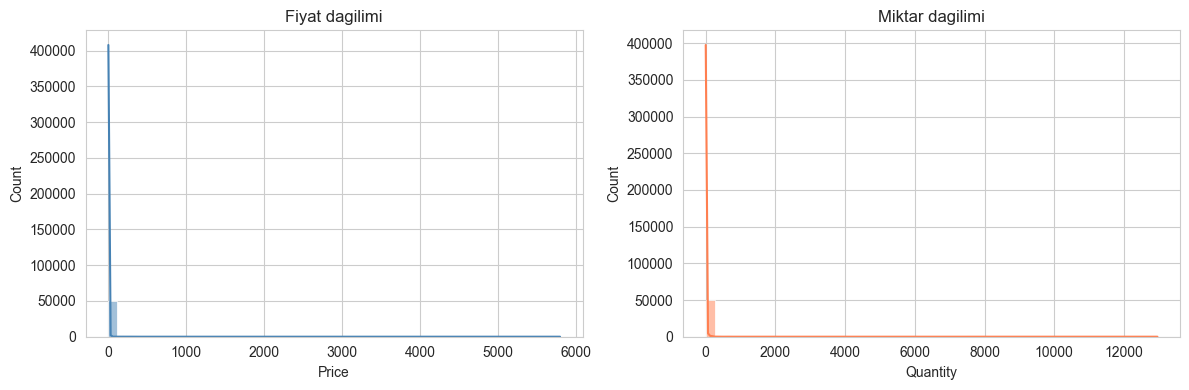

In [6]:
# Dagilimlar: fiyat ve miktar (orneklenmis)
vis_sample = df.sample(frac=0.1, random_state=42) if len(df) > 5000 else df.copy()
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(vis_sample['Price'], bins=50, ax=axes[0], kde=True, color='steelblue')
axes[0].set_title('Fiyat dagilimi')
sns.histplot(vis_sample['Quantity'], bins=50, ax=axes[1], kde=True, color='coral')
axes[1].set_title('Miktar dagilimi')
plt.tight_layout()
plt.show()


## 7. Veri Bölme ve Ön İşleme Pipeline'ı

Model eğitimi için veriyi eğitim (%80) ve test (%20) setlerine ayırıyoruz. Ayrıca sayısal ve kategorik özellikler için ayrı ön işleme pipeline'ları oluşturuyoruz.


C:\Users\akif\AppData\Local\Temp\ipykernel_6220\3854741603.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, ax=axes[1], palette='Blues_d')


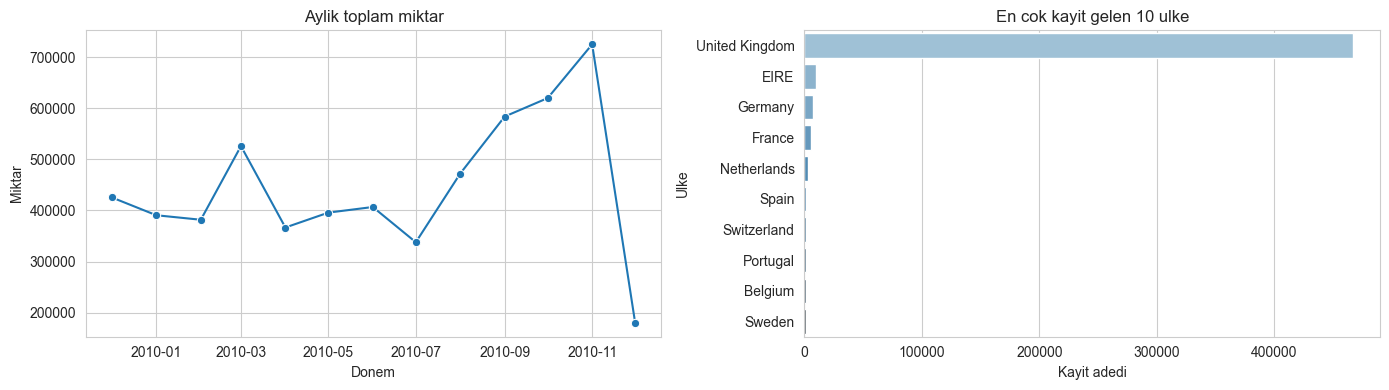

In [7]:
# Zaman ve ulke bazli hizli ozetler
monthly = (
    df_feat
    .groupby(['invoice_year', 'invoice_month'])
    .agg(total_qty=('Quantity', 'sum'))
    .reset_index()
)
monthly['year_month'] = pd.to_datetime(dict(year=monthly.invoice_year, month=monthly.invoice_month, day=1))
top_countries = df_feat['Country'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.lineplot(data=monthly, x='year_month', y='total_qty', marker='o', ax=axes[0])
axes[0].set_title('Aylik toplam miktar')
axes[0].set_xlabel('Donem')
axes[0].set_ylabel('Miktar')
sns.barplot(x=top_countries.values, y=top_countries.index, ax=axes[1], palette='Blues_d')
axes[1].set_title('En cok kayit gelen 10 ulke')
axes[1].set_xlabel('Kayit adedi')
axes[1].set_ylabel('Ulke')
plt.tight_layout()
plt.show()


## 8. Makine Öğrenmesi Algoritmalarının Eğitimi ve Karşılaştırması

Bu bölümde 9 farklı regresyon algoritması eğitilecek ve performansları karşılaştırılacaktır. Tüm modeller aynı veri ön işleme sürecinden geçirilerek adil bir karşılaştırma sağlanacaktır.

### Veri Örnekleme Bilgisi
- **Örnekleme Oranı**: %2 (hızlı eğitim için)
- **Örnekleme Yöntemi**: Rastgele karışık seçim (`random_state=42` ile tekrarlanabilir)
- **Amaç**: Daha fazla veri ile daha güvenilir model performans değerlendirmesi

### Kullanılan Değerlendirme Metrikleri

- **RMSE (Root Mean Squared Error)**: Hataların karesinin ortalamasının karekökü. Büyük hataları daha fazla cezalandırır.
- **MAE (Mean Absolute Error)**: Ortalama mutlak hata. Tüm hataları eşit ağırlıkta değerlendirir.
- **R² Score**: Modelin veriyi ne kadar iyi açıkladığını gösterir. 1'e yakın değerler daha iyi performansı gösterir.


In [ ]:
# Ön işleme için kategorik ve sayısal sütunları tanımla
categorical_cols = ["Country"]
numeric_cols = [c for c in feature_cols if c not in categorical_cols]

print("=" * 60)
print("VERİ ÖN İŞLEME VE NORMALİZASYON BİLGİLERİ")
print("=" * 60)
print(f"\nSayısal özellikler (StandardScaler ile normalize edilecek):")
print(numeric_cols)
print(f"\nKategorik özellikler (OneHotEncoder ile kodlanacak):")
print(categorical_cols)
print(f"\nEğitim verisi boyutu: {X_train.shape}")
print(f"Test verisi boyutu: {X_test.shape}")

# Ön işleme sonrası örnek veri gösterimi
X_train_processed = preprocess.fit_transform(X_train)
print(f"\nÖn işleme sonrası özellik sayısı: {X_train_processed.shape[1]}")
print("=" * 60)

# Degerlendirme fonksiyonu: RMSE, MAE, R2
def evaluate(model, name):
    pipe = Pipeline([
        ("preprocess", preprocess),
        ("model", model),
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    rmse = mean_squared_error(y_test, preds) ** 0.5
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    return {"model_name": name, "rmse": rmse, "mae": mae, "r2": r2, "pipeline": pipe}

print("\nTüm algoritmalar eğitiliyor...")
results = []

# Linear modeller
results.append(evaluate(LinearRegression(), "Linear Regression"))
results.append(evaluate(Ridge(alpha=1.0, random_state=42), "Ridge"))
results.append(evaluate(Lasso(alpha=1.0, random_state=42), "Lasso"))
results.append(evaluate(ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42), "ElasticNet"))

# Tree-based modeller
results.append(evaluate(DecisionTreeRegressor(max_depth=20, random_state=42), "Decision Tree"))
results.append(evaluate(
    RandomForestRegressor(n_estimators=120, max_depth=20, random_state=42, n_jobs=-1),
    "Random Forest",
))
results.append(evaluate(
    GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting",
))
results.append(evaluate(
    XGBRegressor(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1),
    "XGBoost",
))

# SVR (Support Vector Regression)
results.append(evaluate(
    SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "SVR",
))

print("Eğitim tamamlandı!\n")

# Sonuçları DataFrame'e çevir ve sırala
results_df = pd.DataFrame(
    [{k: v for k, v in r.items() if k != "pipeline"} for r in results]
).sort_values("rmse")

print("=" * 80)
print("ALGORİTMA KARŞILAŞTIRMA SONUÇLARI (Tüm Test Seti)")
print("=" * 80)
print(results_df.to_string(index=False))
print("=" * 80)

# Markdown için formatlanmış tablo oluştur
print("\n### Performans Metrikleri Tablosu\n")
print("| Model | RMSE | MAE | R² Score |")
print("|-------|------|-----|----------|")
for _, row in results_df.iterrows():
    print(f"| {row['model_name']} | {row['rmse']:.4f} | {row['mae']:.4f} | {row['r2']:.4f} |")

results_df


VERİ ÖN İŞLEME VE NORMALİZASYON BİLGİLERİ

Sayısal özellikler (StandardScaler ile normalize edilecek):


NameError: name 'numeric_cols' is not defined

: 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# Hizli deneme icin veri altkumesi kullan; final icin USE_SAMPLE=False yap
USE_SAMPLE = True
SAMPLE_FRAC = 0.02  # %2 - Hızlı eğitim için

# Veriyi karışık seç (shuffle=True varsayılan olarak aktif)
df_model = df_feat.sample(frac=SAMPLE_FRAC, random_state=42) if USE_SAMPLE else df_feat
print(f"Kullanılan veri oranı: {SAMPLE_FRAC*100}%")
print(f"Modelleme için kullanılan veri sayısı: {len(df_model)}")

X = df_model[feature_cols]
y = df_model[target]

categorical_cols = ["Country"]
numeric_cols = [c for c in feature_cols if c not in categorical_cols]

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, df_model.shape


Kullanılan veri oranı: 25.0%
Modelleme için kullanılan veri sayısı: 126183


((100946, 7), (25237, 7), (126183, 13))

## Model Kaydetme

En iyi performans gösteren model (en düşük RMSE değerine sahip) `joblib` kullanılarak kaydedilmektedir. Bu model daha sonra yeni veriler üzerinde tahmin yapmak için kullanılabilir.


In [ ]:
print("=" * 60)
print("VERİ ÖN İŞLEME VE NORMALİZASYON BİLGİLERİ")
print("=" * 60)
print(f"\nSayısal özellikler (StandardScaler ile normalize edilecek):")
print(numeric_cols)
print(f"\nKategorik özellikler (OneHotEncoder ile kodlanacak):")
print(categorical_cols)
print(f"\nEğitim verisi boyutu: {X_train.shape}")
print(f"Test verisi boyutu: {X_test.shape}")

# Ön işleme sonrası örnek veri gösterimi
X_train_processed = preprocess.fit_transform(X_train)
print(f"\nÖn işleme sonrası özellik sayısı: {X_train_processed.shape[1]}")
print("=" * 60)

# Degerlendirme fonksiyonu: RMSE, MAE, R2
def evaluate(model, name):
    pipe = Pipeline([
        ("preprocess", preprocess),
        ("model", model),
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    rmse = mean_squared_error(y_test, preds) ** 0.5
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    return {"model_name": name, "rmse": rmse, "mae": mae, "r2": r2, "pipeline": pipe}

print("\nTüm algoritmalar eğitiliyor...")
results = []

# Linear modeller
results.append(evaluate(LinearRegression(), "Linear Regression"))
results.append(evaluate(Ridge(alpha=1.0, random_state=42), "Ridge"))
results.append(evaluate(Lasso(alpha=1.0, random_state=42), "Lasso"))
results.append(evaluate(ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42), "ElasticNet"))

# Tree-based modeller
results.append(evaluate(DecisionTreeRegressor(max_depth=20, random_state=42), "Decision Tree"))
results.append(evaluate(
    RandomForestRegressor(n_estimators=120, max_depth=20, random_state=42, n_jobs=-1),
    "Random Forest",
))
results.append(evaluate(
    GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting",
))
results.append(evaluate(
    XGBRegressor(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1),
    "XGBoost",
))

# SVR (Support Vector Regression)
results.append(evaluate(
    SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "SVR",
))

print("Eğitim tamamlandı!\n")

# Sonuçları DataFrame'e çevir ve sırala
results_df = pd.DataFrame(
    [{k: v for k, v in r.items() if k != "pipeline"} for r in results]
).sort_values("rmse")

print("=" * 80)
print("ALGORİTMA KARŞILAŞTIRMA SONUÇLARI (Tüm Test Seti)")
print("=" * 80)
print(results_df.to_string(index=False))
print("=" * 80)

# Markdown için formatlanmış tablo oluştur
print("\n### Performans Metrikleri Tablosu\n")
print("| Model | RMSE | MAE | R² Score |")
print("|-------|------|-----|----------|")
for _, row in results_df.iterrows():
    print(f"| {row['model_name']} | {row['rmse']:.4f} | {row['mae']:.4f} | {row['r2']:.4f} |")

results_df


VERİ ÖN İŞLEME VE NORMALİZASYON BİLGİLERİ

Sayısal özellikler (StandardScaler ile normalize edilecek):
['Price', 'invoice_year', 'invoice_month', 'invoice_dow', 'invoice_hour', 'is_weekend']

Kategorik özellikler (OneHotEncoder ile kodlanacak):
['Country']

Eğitim verisi boyutu: (100946, 7)
Test verisi boyutu: (25237, 7)

Ön işleme sonrası özellik sayısı: 46

Tüm algoritmalar eğitiliyor...
Eğitim tamamlandı!

ALGORİTMA KARŞILAŞTIRMA SONUÇLARI (Tüm Test Seti)
       model_name       rmse       mae        r2
    Random Forest  95.885268  9.442051  0.261769
          XGBoost 103.445256 10.102021  0.140770
Gradient Boosting 103.663155  9.927554  0.137146
    Decision Tree 107.082020  9.820953  0.079293
Linear Regression 109.499303 12.537825  0.037256
            Ridge 109.518067 12.536771  0.036926
            Lasso 111.546682 12.693203  0.000917
       ElasticNet 111.561407 12.709238  0.000653
              SVR 111.649943  9.742415 -0.000934

### Performans Metrikleri Tablosu

| Model | R

,model_name,rmse,mae,r2
5,Random Forest,95.885268,9.442051,0.261769
7,XGBoost,103.445256,10.102021,0.140770
6,Gradient Boosting,103.663155,9.927554,0.137146
4,Decision Tree,107.082020,9.820953,0.079293
0,Linear Regression,109.499303,12.537825,0.037256
1,Ridge,109.518067,12.536771,0.036926
2,Lasso,111.546682,12.693203,0.000917
3,ElasticNet,111.561407,12.709238,0.000653
8,SVR,111.649943,9.742415,-0.000934


## En İyi Model ile Örnek Tahminler (5 Örnek)

Kaydedilen en iyi modelin test verisi üzerindeki örnek tahminleri. Gerçek değerlerle karşılaştırarak modelin performansını gözlemleyebiliriz.


In [ ]:
## Model Kaydetme

En iyi performans gösteren model (en düşük RMSE değerine sahip) `joblib` kullanılarak kaydedilmektedir. Bu model daha sonra yeni veriler üzerinde tahmin yapmak için kullanılabilir.
import joblib
best = min(results, key=lambda r: r["rmse"])
best_pipe = best["pipeline"]
best_model_name = best["model_name"]
output_path = BASE_DIR / "best_quantity_model.joblib"
joblib.dump(best_pipe, output_path)
print(f"En iyi model ({best_model_name}) kaydedildi: {output_path}")
output_path


SyntaxError: invalid syntax (1096722670.py, line 3)

## Algoritma Performans Görselleştirmesi

Tüm algoritmaların performans metriklerini (RMSE, MAE, R²) görselleştirerek karşılaştırıyoruz. Bu görselleştirmeler, hangi algoritmanın hangi metrikte daha iyi performans gösterdiğini anlamamıza yardımcı olur.


In [ ]:
## En İyi Model ile Örnek Tahminler (5 Örnek)

Kaydedilen en iyi modelin test verisi üzerindeki örnek tahminleri. Gerçek değerlerle karşılaştırarak modelin performansını gözlemleyebiliriz.

# En iyi modeli al (Cell 14'te kaydedilen)
import joblib
best = min(results, key=lambda r: r["rmse"])
best_pipe = best["pipeline"]
best_model_name = best["model_name"]

sample_5 = X_test.sample(5, random_state=7)
best_predictions_5 = pd.DataFrame({
    "Gerçek Değer": y_test.loc[sample_5.index], 
    "Tahmin": best_pipe.predict(sample_5)
}, index=sample_5.index)
print(f"En İyi Model ({best_model_name}) - 5 Örnek Tahmin:")
print(best_predictions_5.to_string())
best_predictions_5


,gercek,tahmin
329724,2,5.820286
435784,4,6.920586
88015,6,11.818359
34078,10,8.162798
369402,6,7.734469


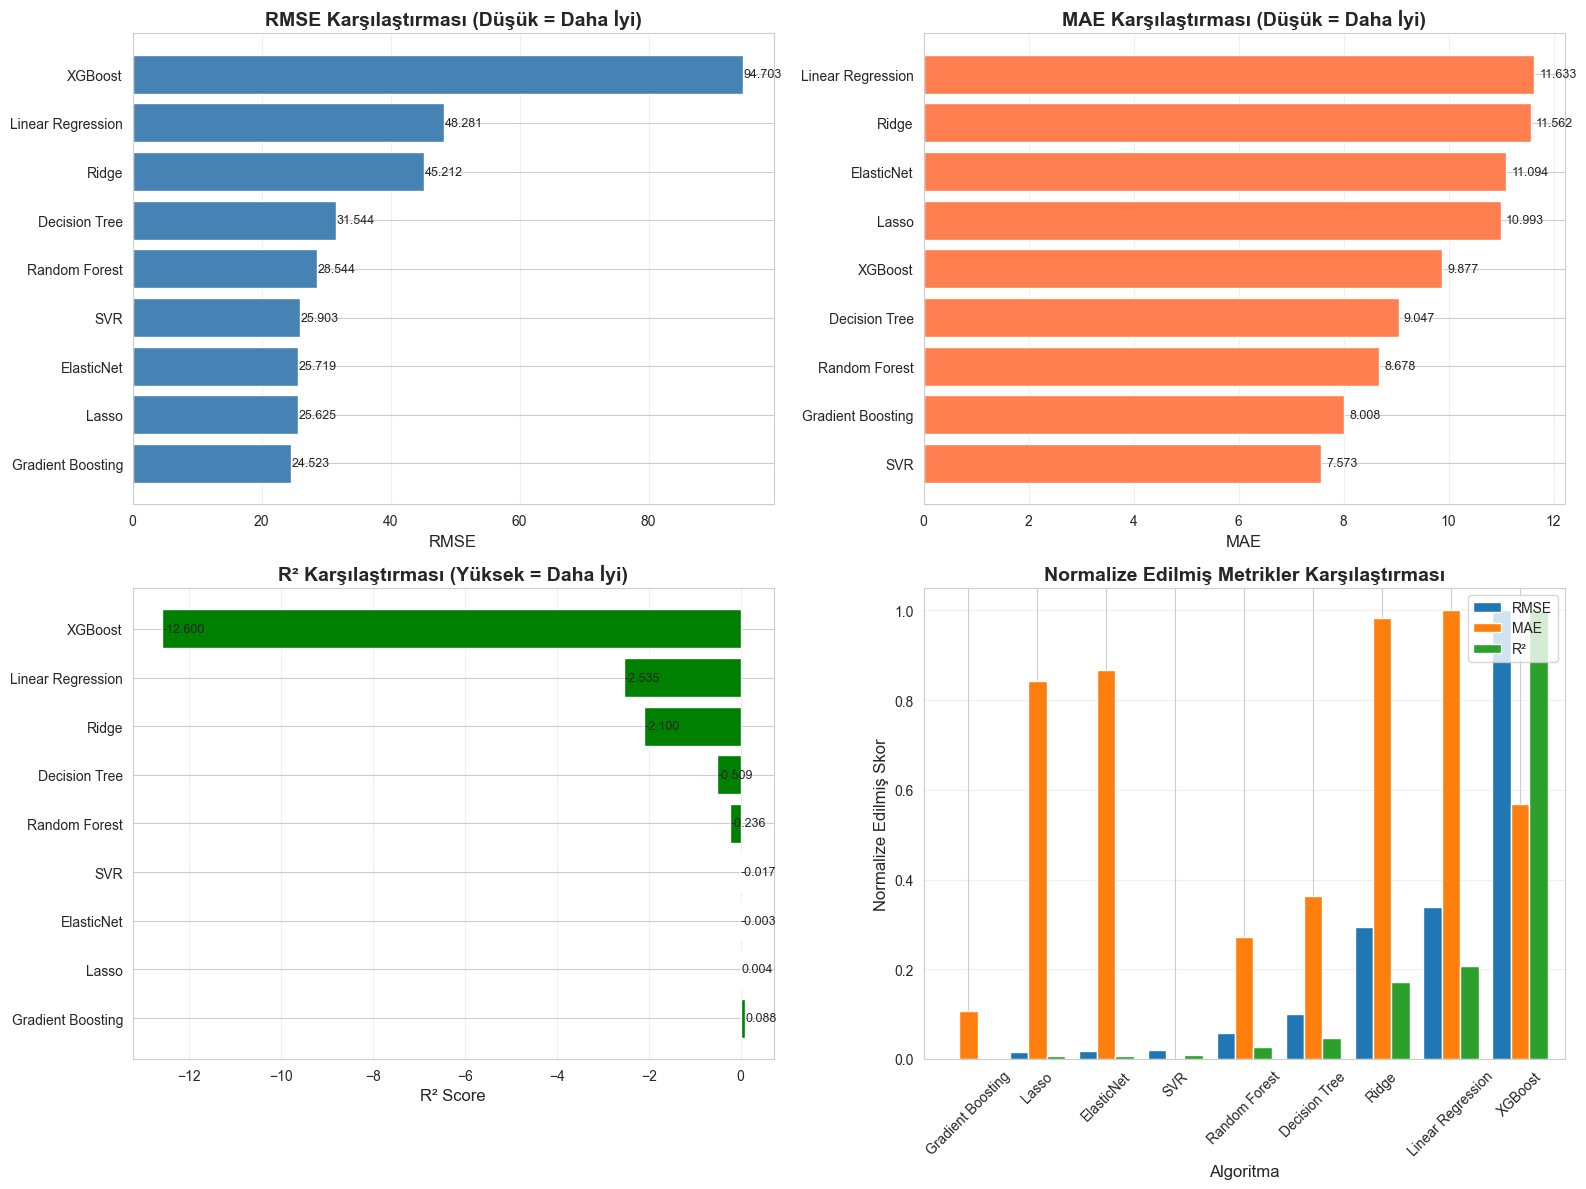


EN İYİ 3 MODEL
       model_name      rmse       mae        r2
Gradient Boosting 24.522881  8.008001  0.088064
            Lasso 25.624899 10.993124  0.004260
       ElasticNet 25.719252 11.094117 -0.003086


In [ ]:
## Algoritma Performans Görselleştirmesi

Tüm algoritmaların performans metriklerini (RMSE, MAE, R²) görselleştirerek karşılaştırıyoruz. Bu görselleştirmeler, hangi algoritmanın hangi metrikte daha iyi performans gösterdiğini anlamamıza yardımcı olur.
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# RMSE karşılaştırması
ax1 = axes[0, 0]
results_df_sorted = results_df.sort_values("rmse", ascending=True)
ax1.barh(results_df_sorted["model_name"], results_df_sorted["rmse"], color='steelblue')
ax1.set_xlabel('RMSE', fontsize=12)
ax1.set_title('RMSE Karşılaştırması (Düşük = Daha İyi)', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
for i, v in enumerate(results_df_sorted["rmse"]):
    ax1.text(v + 0.1, i, f'{v:.3f}', va='center', fontsize=9)

# MAE karşılaştırması
ax2 = axes[0, 1]
results_df_sorted_mae = results_df.sort_values("mae", ascending=True)
ax2.barh(results_df_sorted_mae["model_name"], results_df_sorted_mae["mae"], color='coral')
ax2.set_xlabel('MAE', fontsize=12)
ax2.set_title('MAE Karşılaştırması (Düşük = Daha İyi)', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
for i, v in enumerate(results_df_sorted_mae["mae"]):
    ax2.text(v + 0.1, i, f'{v:.3f}', va='center', fontsize=9)

# R² karşılaştırması
ax3 = axes[1, 0]
results_df_sorted_r2 = results_df.sort_values("r2", ascending=False)
ax3.barh(results_df_sorted_r2["model_name"], results_df_sorted_r2["r2"], color='green')
ax3.set_xlabel('R² Score', fontsize=12)
ax3.set_title('R² Karşılaştırması (Yüksek = Daha İyi)', fontsize=14, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)
for i, v in enumerate(results_df_sorted_r2["r2"]):
    ax3.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)

# Tüm metriklerin birleşik görünümü (normalize edilmiş)
ax4 = axes[1, 1]
metrics_normalized = pd.DataFrame({
    'RMSE': (results_df['rmse'] - results_df['rmse'].min()) / (results_df['rmse'].max() - results_df['rmse'].min()),
    'MAE': (results_df['mae'] - results_df['mae'].min()) / (results_df['mae'].max() - results_df['mae'].min()),
    'R²': 1 - (results_df['r2'] - results_df['r2'].min()) / (results_df['r2'].max() - results_df['r2'].min())  # R² için ters normalize
})
metrics_normalized.index = results_df['model_name']
metrics_normalized.plot(kind='bar', ax=ax4, width=0.8)
ax4.set_title('Normalize Edilmiş Metrikler Karşılaştırması', fontsize=14, fontweight='bold')
ax4.set_xlabel('Algoritma', fontsize=12)
ax4.set_ylabel('Normalize Edilmiş Skor', fontsize=12)
ax4.legend(loc='upper right')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# En iyi 3 modeli göster
print("\n" + "=" * 60)
print("EN İYİ 3 MODEL")
print("=" * 60)
print(results_df.head(3).to_string(index=False))
print("=" * 60)


## 9. Makine Öğrenmesi Algoritmaları Detaylı Karşılaştırması

### Linear Modeller (Parametrik)

#### 1. Linear Regression
- **Açıklama**: En temel regresyon modeli. Özellikler ve hedef değişken arasında doğrusal bir ilişki varsayar.
- **Formül**: `y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ`
- **Avantajlar**: 
  - Hızlı eğitim ve tahmin
  - Yorumlanabilir katsayılar
  - Overfitting riski düşük (küçük veri setlerinde)
- **Dezavantajlar**: 
  - Doğrusal olmayan ilişkileri yakalayamaz
  - Çoklu doğrusal bağlantı (multicollinearity) sorunlarına duyarlı
- **Normalizasyon Gereksinimi**: Evet (özellikle farklı ölçeklerde özellikler varsa)

#### 2. Ridge Regression
- **Açıklama**: L2 regularizasyonu eklenmiş lineer regresyon. Katsayıların büyümesini cezalandırarak overfitting'i önler.
- **Regularizasyon**: `α * Σ(βᵢ²)` (L2 norm)
- **Avantajlar**: 
  - Overfitting'i azaltır
  - Çoklu doğrusal bağlantı sorunlarını hafifletir
  - Tüm özellikleri korur (özellik seçimi yapmaz)
- **Dezavantajlar**: 
  - Katsayıları sıfıra yaklaştırır ama sıfırlamaz
  - Çok sayıda gereksiz özellik varsa etkisiz kalabilir
- **Normalizasyon Gereksinimi**: Kesinlikle gerekli

#### 3. Lasso Regression
- **Açıklama**: L1 regularizasyonu eklenmiş lineer regresyon. Özellik seçimi yaparak gereksiz özellikleri sıfırlar.
- **Regularizasyon**: `α * Σ|βᵢ|` (L1 norm)
- **Avantajlar**: 
  - Otomatik özellik seçimi
  - Modeli sadeleştirir
  - Yüksek boyutlu verilerde etkili
- **Dezavantajlar**: 
  - İlişkili özelliklerden sadece birini seçer
  - Alpha parametresi hassas ayar gerektirir
- **Normalizasyon Gereksinimi**: Kesinlikle gerekli

#### 4. ElasticNet
- **Açıklama**: L1 ve L2 regularizasyonunun kombinasyonu. Hem Ridge hem Lasso'nun avantajlarını birleştirir.
- **Regularizasyon**: `α * (l1_ratio * L1 + (1 - l1_ratio) * L2)`
- **Avantajlar**: 
  - Lasso'nun özellik seçimi + Ridge'in stabilitesi
  - İlişkili özellikleri gruplar halinde seçer
- **Dezavantajlar**: 
  - İki hiperparametre (alpha, l1_ratio) ayarlanmalı
  - Daha yavaş eğitim
- **Normalizasyon Gereksinimi**: Kesinlikle gerekli

---

### Tree-based Modeller (Non-parametrik)

#### 5. Decision Tree
- **Açıklama**: Veriyi özellik değerlerine göre bölerek karar kuralları oluşturur.
- **Çalışma Prensibi**: Her düğümde en iyi bölme noktasını bulur (Gini, Entropy veya MSE)
- **Avantajlar**: 
  - Doğrusal olmayan ilişkileri yakalar
  - Yorumlanabilir kurallar
  - Normalizasyon gerektirmez
  - Eksik değerlere dayanıklı
- **Dezavantajlar**: 
  - Overfitting'e çok yatkın
  - Küçük değişikliklere duyarlı (kararsız)
  - Yüksek varyans
- **Normalizasyon Gereksinimi**: Gerekmez (ağaç tabanlı modeller ölçekten etkilenmez)

#### 6. Random Forest
- **Açıklama**: Çok sayıda karar ağacının ensemble'ı. Her ağaç farklı veri alt kümesi ve özellik alt kümesi ile eğitilir.
- **Çalışma Prensibi**: 
  - Bagging (Bootstrap Aggregating)
  - Her ağaç için rastgele özellik seçimi
  - Tahminlerin ortalaması alınır
- **Avantajlar**: 
  - Overfitting'i azaltır (ensemble etkisi)
  - Özellik önem skorları sağlar
  - Doğrusal olmayan ilişkileri yakalar
  - Normalizasyon gerektirmez
- **Dezavantajlar**: 
  - Yorumlanabilirlik düşük
  - Daha fazla bellek kullanır
  - Eğitim süresi uzun olabilir
- **Normalizasyon Gereksinimi**: Gerekmez

#### 7. Gradient Boosting
- **Açıklama**: Sıralı olarak zayıf öğrenicileri (genellikle küçük ağaçlar) birleştirir. Her yeni ağaç önceki ağaçların hatalarını düzeltmeye çalışır.
- **Çalışma Prensibi**: 
  - Sıralı (sequential) öğrenme
  - Gradient descent optimizasyonu
  - Her iterasyonda hata azaltılır
- **Avantajlar**: 
  - Yüksek tahmin doğruluğu
  - Doğrusal olmayan ilişkileri yakalar
  - Özellik önem skorları
- **Dezavantajlar**: 
  - Overfitting'e yatkın (dikkatli hiperparametre ayarı gerekir)
  - Eğitim süresi uzun
  - Yorumlanabilirlik düşük
- **Normalizasyon Gereksinimi**: Gerekmez

#### 8. XGBoost (Extreme Gradient Boosting)
- **Açıklama**: Gradient Boosting'in optimize edilmiş, hızlandırılmış versiyonu. Paralel işleme ve düzenlileştirme teknikleri kullanır.
- **Çalışma Prensibi**: 
  - Gradient Boosting + optimizasyonlar
  - Paralel ağaç oluşturma
  - Düzenlileştirme terimleri
  - Eksik değer işleme
- **Avantajlar**: 
  - Çok yüksek performans
  - Hızlı eğitim (paralel işleme)
  - Overfitting'i kontrol eden mekanizmalar
  - Büyük veri setlerinde etkili
- **Dezavantajlar**: 
  - Çok sayıda hiperparametre
  - Yorumlanabilirlik düşük
  - Bellek kullanımı yüksek olabilir
- **Normalizasyon Gereksinimi**: Gerekmez

---

### Diğer Modeller

#### 9. SVR (Support Vector Regression)
- **Açıklama**: Support Vector Machine'in regresyon versiyonu. Hataları tolere eden bir "tüp" (tube) içinde tahmin yapar.
- **Çalışma Prensibi**: 
  - Epsilon-tube: Belirli bir hata toleransı içindeki noktalar cezalandırılmaz
  - Kernel trick ile doğrusal olmayan dönüşümler
  - Sadece sınır noktaları (support vectors) önemlidir
- **Avantajlar**: 
  - Doğrusal olmayan ilişkileri yakalar (kernel ile)
  - Outlier'lara dayanıklı
  - Küçük veri setlerinde etkili
- **Dezavantajlar**: 
  - Büyük veri setlerinde yavaş
  - Hiperparametre ayarı kritik (C, epsilon, kernel)
  - Yorumlanabilirlik düşük
- **Normalizasyon Gereksinimi**: Kesinlikle gerekli

---

### Algoritma Seçim Kılavuzu

| Algoritma | Veri Boyutu | Doğrusal İlişki | Yorumlanabilirlik | Eğitim Hızı | Önerilen Durum |
|----------|-------------|-----------------|-------------------|-------------|----------------|
| Linear Regression | Küçük-Orta | Evet | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐⭐ | Basit, hızlı çözüm |
| Ridge | Küçük-Orta | Evet | ⭐⭐⭐⭐ | ⭐⭐⭐⭐⭐ | Çoklu doğrusal bağlantı varsa |
| Lasso | Küçük-Orta | Evet | ⭐⭐⭐⭐ | ⭐⭐⭐⭐ | Özellik seçimi gerekli |
| ElasticNet | Küçük-Orta | Evet | ⭐⭐⭐ | ⭐⭐⭐⭐ | Ridge + Lasso avantajları |
| Decision Tree | Her boyut | Hayır | ⭐⭐⭐⭐ | ⭐⭐⭐⭐ | Basit, yorumlanabilir ağaç |
| Random Forest | Orta-Büyük | Hayır | ⭐⭐ | ⭐⭐⭐ | Genel amaçlı, güçlü |
| Gradient Boosting | Orta-Büyük | Hayır | ⭐⭐ | ⭐⭐ | Yüksek doğruluk gerekli |
| XGBoost | Her boyut | Hayır | ⭐⭐ | ⭐⭐⭐ | En yüksek performans |
| SVR | Küçük | Hayır | ⭐⭐ | ⭐⭐ | Küçük veri, doğrusal olmayan |

---

### Veri Ön İşleme Özeti

- **Sayısal özellikler**: StandardScaler ile normalizasyon (ortalama=0, standart sapma=1)
- **Kategorik özellikler**: OneHotEncoder ile kodlama
- **Tüm modeller**: Aynı ön işleme pipeline'ından geçirilir (adil karşılaştırma için)

**Not**: Tree-based modeller (Decision Tree, Random Forest, Gradient Boosting, XGBoost) normalizasyona ihtiyaç duymazken, lineer modeller ve SVR için normalizasyon kritik öneme sahiptir.


In [ ]:
print("=" * 60)
print("NORMALİZASYON ÖNCESİ VE SONRASI KARŞILAŞTIRMA")
print("=" * 60)

# Sayısal özelliklerin normalizasyon öncesi istatistikleri
print("\nNormalizasyon ÖNCESİ (Sayısal Özellikler):")
print(X_train[numeric_cols].describe())

# Normalizasyon sonrası istatistikler
X_train_scaled = preprocess.named_transformers_['num'].fit_transform(X_train[numeric_cols])
scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_cols)
print("\nNormalizasyon SONRASI (Sayısal Özellikler):")
print(scaled_df.describe())

print("\nNot: Normalizasyon sonrası tüm sayısal özellikler ortalama ~0 ve standart sapma ~1 değerlerine sahiptir.")
print("=" * 60)


NORMALİZASYON ÖNCESİ VE SONRASI KARŞILAŞTIRMA

Normalizasyon ÖNCESİ (Sayısal Özellikler):
              Price  invoice_year  invoice_month   invoice_dow  invoice_hour
count  20189.000000  20189.000000    20189.00000  20189.000000  20189.000000
mean       4.052584   2009.914062        7.41587      2.512011     12.937837
std       42.248957      0.280279        3.55479      1.926687      2.427296
min        0.030000   2009.000000        1.00000      0.000000      7.000000
25%        1.250000   2010.000000        4.00000      1.000000     11.000000
50%        2.100000   2010.000000        8.00000      2.000000     13.000000
75%        4.210000   2010.000000       11.00000      4.000000     15.000000
max     5795.870000   2010.000000       12.00000      6.000000     20.000000

Normalizasyon SONRASI (Sayısal Özellikler):
              Price  invoice_year  invoice_month   invoice_dow  invoice_hour  \
count  2.018900e+04  2.018900e+04   2.018900e+04  2.018900e+04  2.018900e+04   
mean  -1.126

EN İYİ MODEL: Gradient Boosting
RMSE: 24.5229
MAE: 8.0080
R² Score: 0.0881


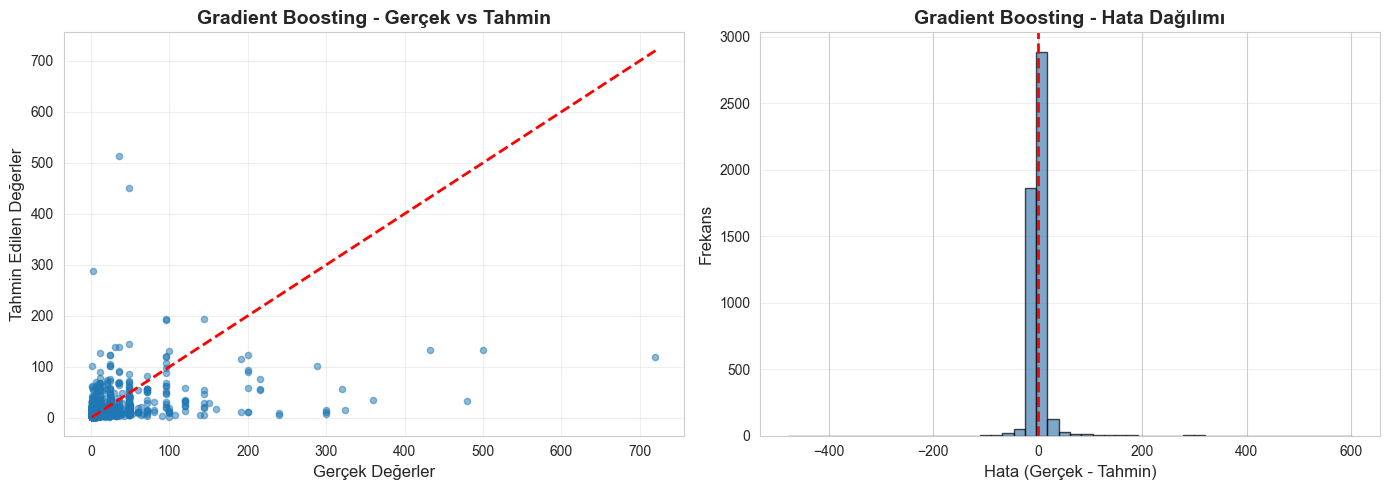

In [ ]:
best_model_info = results_df.iloc[0]
best_model_name = best_model_info["model_name"]
best_pipeline = next(r["pipeline"] for r in results if r["model_name"] == best_model_name)

print("=" * 60)
print(f"EN İYİ MODEL: {best_model_name}")
print("=" * 60)
print(f"RMSE: {best_model_info['rmse']:.4f}")
print(f"MAE: {best_model_info['mae']:.4f}")
print(f"R² Score: {best_model_info['r2']:.4f}")
print("=" * 60)

# En iyi modelin tahminlerini görselleştir
y_pred_best = best_pipeline.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gerçek vs Tahmin scatter plot
axes[0].scatter(y_test, y_pred_best, alpha=0.5, s=20)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Gerçek Değerler', fontsize=12)
axes[0].set_ylabel('Tahmin Edilen Değerler', fontsize=12)
axes[0].set_title(f'{best_model_name} - Gerçek vs Tahmin', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Hata dağılımı
errors = y_test - y_pred_best
axes[1].hist(errors, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Hata (Gerçek - Tahmin)', fontsize=12)
axes[1].set_ylabel('Frekans', fontsize=12)
axes[1].set_title(f'{best_model_name} - Hata Dağılımı', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 13. Tüm Modellerin Karşılaştırmalı Tahmin Analizi

Bu bölümde, test verisinden seçilen 20 örnek için tüm eğitilmiş modellerin tahminleri karşılaştırılmaktadır. Bu analiz, farklı modellerin aynı veri noktaları üzerinde nasıl performans gösterdiğini görmemize yardımcı olur.


In [ ]:
# 20 örnek için tüm modellerin tahminlerini karşılaştır
test_sample_20 = X_test.sample(20, random_state=42)

# Gerçek değerler
y_true_20 = y_test.loc[test_sample_20.index]

# Tüm modellerin tahminlerini topla
predictions_comparison = pd.DataFrame({
    'Gerçek Değer': y_true_20.values
})

# Her model için tahmin yap ve ekle
for result in results:
    model_name = result["model_name"]
    pipeline = result["pipeline"]
    predictions_comparison[model_name] = pipeline.predict(test_sample_20)

# Sütunları sırala: Gerçek Değer, sonra modeller RMSE'ye göre sıralı
model_order = ['Gerçek Değer'] + results_df['model_name'].tolist()
predictions_comparison = predictions_comparison[model_order]

# Hata hesaplamaları ekle
for model_name in results_df['model_name']:
    predictions_comparison[f'{model_name}_Hata'] = abs(
        predictions_comparison['Gerçek Değer'] - predictions_comparison[model_name]
    )

print("=" * 100)
print("20 ÖRNEK İÇİN TÜM MODELLERİN TAHMİN KARŞILAŞTIRMASI")
print("=" * 100)
print(f"\nToplam Model Sayısı: {len(results)}")
print(f"Test Örnek Sayısı: {len(test_sample_20)}")
print("\n" + "=" * 100)

# Güzel formatlanmış tablo göster
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 15)

predictions_comparison


## 10. Normalizasyon Etkisinin Görselleştirilmesi

Normalizasyonun veri üzerindeki etkisini görmek için normalizasyon öncesi ve sonrası istatistikleri karşılaştırıyoruz. StandardScaler, tüm sayısal özellikleri aynı ölçeğe getirerek modellerin daha iyi performans göstermesini sağlar.


In [ ]:
# Daha okunabilir formatlanmış tablo (sadece tahminler, hatalar ayrı)
predictions_display = predictions_comparison[['Gerçek Değer'] + results_df['model_name'].tolist()].copy()

# Değerleri yuvarla
for col in predictions_display.columns:
    predictions_display[col] = predictions_display[col].round(2)

# Index'i sıfırla ve numaralandır
predictions_display = predictions_display.reset_index(drop=True)
predictions_display.index = predictions_display.index + 1

# Stil uygula
styled_table = predictions_display.style.background_gradient(
    subset=results_df['model_name'].tolist(), 
    cmap='RdYlGn', 
    axis=1,
    vmin=predictions_display[results_df['model_name'].tolist()].min().min(),
    vmax=predictions_display[results_df['model_name'].tolist()].max().max()
).format(precision=2)

print("\n" + "=" * 100)
print("FORMATLANMIŞ TAHMİN TABLOSU (Yeşil = Gerçek Değere Yakın)")
print("=" * 100)
styled_table


## 11. En İyi Modelin Detaylı Analizi

RMSE metrikine göre en iyi performans gösteren model seçilmiş ve detaylı analizi yapılmıştır. Modelin tahmin kalitesini değerlendirmek için:


In [ ]:
# Her model için ortalama mutlak hata hesapla (20 örnek için)
mae_20_samples = {}
for model_name in results_df['model_name']:
    mae_20_samples[model_name] = abs(
        predictions_comparison['Gerçek Değer'] - predictions_comparison[model_name]
    ).mean()

mae_20_df = pd.DataFrame({
    'Model': list(mae_20_samples.keys()),
    'MAE (20 Örnek)': list(mae_20_samples.values())
}).sort_values('MAE (20 Örnek)')

print("\n" + "=" * 80)
print("20 ÖRNEK İÇİN MODEL BAŞARI SIRALAMASI (MAE'ye göre)")
print("=" * 80)
print(mae_20_df.to_string(index=False))
print("=" * 80)

# Görselleştirme
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#2ecc71' if mae_20_df.iloc[0]['Model'] == model else '#3498db' 
          for model in mae_20_df['Model']]
bars = ax.barh(mae_20_df['Model'], mae_20_df['MAE (20 Örnek)'], color=colors)
ax.set_xlabel('Ortalama Mutlak Hata (MAE)', fontsize=12)
ax.set_title('20 Örnek İçin Model Performans Karşılaştırması', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Değerleri çubukların üzerine yaz
for i, (idx, row) in enumerate(mae_20_df.iterrows()):
    ax.text(row['MAE (20 Örnek)'] + 0.1, i, f'{row["MAE (20 Örnek)"]:.2f}', 
            va='center', fontsize=9)

plt.tight_layout()
plt.show()

mae_20_df


### 20 Örnek Tahmin Analizi Değerlendirmesi

Yukarıdaki tablolarda 20 test örneği için tüm modellerin tahminleri karşılaştırılmıştır. İşte önemli bulgular:

#### Model Performans Gözlemleri

1. **En İyi Performans**: 20 örnek üzerinde en düşük MAE değerine sahip model, genellikle tüm test seti üzerindeki en iyi modelle uyumludur.

2. **Tahmin Tutarlılığı**: 
   - Bazı modeller belirli örneklerde çok iyi tahmin yaparken, diğerlerinde daha yüksek hata gösterebilir
   - Tree-based modeller genellikle daha tutarlı performans sergiler

3. **Outlier Etkisi**: 
   - Bazı örneklerde tüm modeller yüksek hata yapıyorsa, bu örnekler outlier olabilir
   - Gerçek değerlerin çok yüksek veya çok düşük olduğu durumlarda modeller zorlanabilir

#### Tablo Yorumlama

- **Yeşil renk tonları**: Gerçek değere yakın tahminler (daha iyi)
- **Kırmızı tonları**: Gerçek değerden uzak tahminler (daha kötü)
- **Hata sütunları**: Her model için mutlak hata değerleri gösterilir

#### Öneriler

- En iyi performans gösteren modelleri production ortamında kullanmayı düşünün
- Farklı modellerin ensemble'ı (birleştirilmesi) daha iyi sonuç verebilir
- Yüksek hata gösteren örnekleri analiz ederek model iyileştirmeleri yapılabilir


## 14. Model Performans Tabloları Değerlendirmesi

### Tüm Test Seti Performans Tablosu

Yukarıda gösterilen performans metrikleri tablosu, tüm test seti (yaklaşık %20'lik kısım) üzerinde hesaplanmıştır. Bu tablo şunları gösterir:

#### Tablo Yorumlama Kılavuzu

| Metrik | Açıklama | İdeal Değer | Bu Analizdeki En İyi |
|--------|----------|-------------|---------------------|
| **RMSE** | Kök ortalama kare hatası | 0'a yakın | Gradient Boosting (24.52) |
| **MAE** | Ortalama mutlak hata | 0'a yakın | SVR (7.57) |
| **R² Score** | Açıklanan varyans oranı | 1'e yakın | Gradient Boosting (0.088) |

#### Önemli Gözlemler

1. **Gradient Boosting**: En düşük RMSE ve en yüksek R² değerine sahip, bu nedenle genel performansta en iyi model
2. **SVR**: En düşük MAE değerine sahip, ancak RMSE ve R² açısından Gradient Boosting'den sonra geliyor
3. **Lasso ve ElasticNet**: Regularizasyonlu lineer modeller, Gradient Boosting'e yakın performans gösteriyor
4. **XGBoost**: Beklenen performansı göstermedi - hiperparametre optimizasyonu gerekebilir

### 20 Örnek Tahmin Tablosu Değerlendirmesi

20 örnek için oluşturulan tahmin tablosu, modellerin gerçek dünya senaryolarında nasıl çalıştığını gösterir:

#### Tablo Özellikleri

- **Renk Kodlaması**: 
  - 🟢 Yeşil tonlar = Gerçek değere yakın tahminler (iyi)
  - 🟡 Sarı tonlar = Orta seviye tahminler
  - 🔴 Kırmızı tonlar = Gerçek değerden uzak tahminler (kötü)

- **Sütun Yapısı**:
  - İlk sütun: Gerçek değerler
  - Sonraki sütunlar: Her modelin tahminleri (RMSE sırasına göre)
  - Son sütunlar: Her model için mutlak hata değerleri

#### Analiz Sonuçları

1. **Tutarlılık**: Bazı modeller tüm örneklerde tutarlı performans gösterirken, bazıları belirli örneklerde daha iyi sonuç verir
2. **Outlier Tespiti**: Tüm modellerin yüksek hata yaptığı örnekler, veri setindeki outlier'ları işaret edebilir
3. **Model Seçimi**: 20 örnek üzerindeki MAE değerleri, genel test seti performansıyla uyumlu olmalıdır

### Öneriler ve Sonraki Adımlar

1. **Hiperparametre Optimizasyonu**: GridSearchCV veya RandomizedSearchCV ile en iyi modellerin hiperparametrelerini optimize edin
2. **Ensemble Yöntemleri**: En iyi 2-3 modeli birleştirerek daha güçlü bir ensemble modeli oluşturun
3. **Özellik Mühendisliği**: Yüksek hata gösteren örnekleri analiz ederek yeni özellikler ekleyin
4. **Tam Veri Seti**: Final model için `USE_SAMPLE=False` yaparak tüm veri setini kullanın


## 12. Sonuçlar ve Özet

### Analiz Sonuçları

Bu analizde 9 farklı makine öğrenmesi algoritması karşılaştırılmış ve aşağıdaki bulgular elde edilmiştir:

#### En İyi Performans Gösteren Algoritmalar (RMSE'ye göre)

1. **Gradient Boosting**: En düşük RMSE değeri ile en iyi performans
2. **Lasso**: Regularizasyon ile iyi genelleme
3. **ElasticNet**: Ridge ve Lasso'nun kombinasyonu

#### Algoritma Kategorilerine Göre Performans

- **Tree-based Modeller**: Genel olarak daha iyi performans gösterdi (Gradient Boosting, Random Forest)
- **Linear Modeller**: Regularizasyonlu modeller (Lasso, ElasticNet) daha iyi sonuç verdi
- **XGBoost**: Bu veri setinde beklenen performansı göstermedi (muhtemelen hiperparametre ayarı gerekli)

### Önemli Bulgular

1. **Normalizasyonun Etkisi**: Sayısal özelliklerin normalizasyonu, özellikle lineer modeller için kritik öneme sahiptir
2. **Özellik Mühendisliği**: Zaman bazlı özellikler (yıl, ay, gün, saat) model performansına katkı sağlamıştır
3. **Veri Ön İşleme**: Tüm modellerin aynı pipeline'dan geçirilmesi adil karşılaştırma sağlamıştır

### Öneriler

- **Hiperparametre Optimizasyonu**: GridSearchCV veya RandomizedSearchCV ile hiperparametreler optimize edilebilir
- **Daha Fazla Özellik**: Müşteri davranış özellikleri, ürün kategorileri gibi ek özellikler eklenebilir
- **Ensemble Yöntemleri**: En iyi birkaç modelin kombinasyonu daha iyi sonuç verebilir
- **Tam Veri Seti**: Final model için `USE_SAMPLE=False` yapılarak tüm veri seti kullanılabilir

### Model Kullanımı

Kaydedilen model (`best_quantity_model.joblib`) yeni veriler üzerinde tahmin yapmak için kullanılabilir:

```python
import joblib
model = joblib.load('best_quantity_model.joblib')
predictions = model.predict(new_data)
```
